# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [59]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [58]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? Ohio

In [60]:
miAverage = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
ohAverage = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
if miAverage > ohAverage:
    print("Michigan has the higher average math score among 4th Graders across all years")
else:
    print ("Ohio has the higher average math score among 4th Graders across all years")
print("Michigan: ", miAverage)
print("Ohio: ", ohAverage)

Ohio has the higher average math score among 4th Graders across all years
Michigan:  234.36363636363637
Ohio:  239.45454545454547


Find the average for your chosen test across all states in 2019: 239.943396

In [61]:
yearAvg = df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()
print("The average math score among 4th Graders in 2019 is: ", yearAvg)

The average math score among 4th Graders in 2019 is:  239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [62]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [72]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_REVENUE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.661510,2.025197,3.627221
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,4.837699,2.132082,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.877685,2.184247,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4.997299,2.732512,5.164536
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.199137,2.680986,5.329154


Feature engineering justification: Firstly, created a new variable that I named "TOTAL_EXPENDITURE_PER_STUDENT" because I wanted to be able to investigate if a state's expenditure could be correlated to higher 4th grade math scores, but since some states have more kids than other states, I standardized the variable so it could be comparable among all states. Secondly, I also created a "TOTAL_REVENUE_PER_STUDENT" variable with a similar purpose as my other variable so I could look for more relationships. Finally, I created a "INSTRUCTION_EXPENDITURE_PER_STUDENT" variable because if I was able to find a correlation between total expenditure per student and 4th grade math scores, I thought I can investigate further and see if a certain aspect of the schools expenditures is more important in the higher 4th grade math grades

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th grade math score')

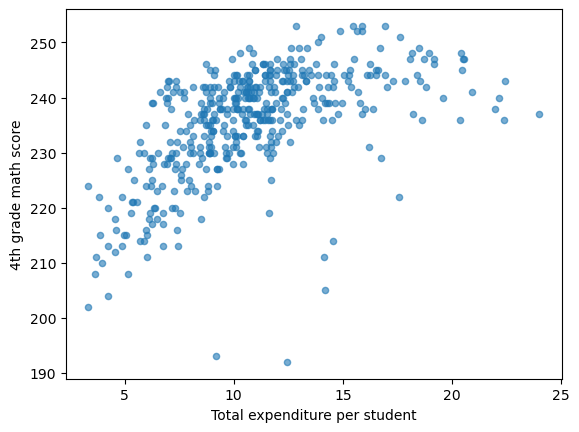

In [74]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Total expenditure per student')
plt.ylabel('4th grade math score')

There appears to be a slight positive correlation between 4th grade math scores and total expendtiture per student with a little bit of scatter and a couple of outliers

**Visualization 2**

Text(0, 0.5, '4th grade math score')

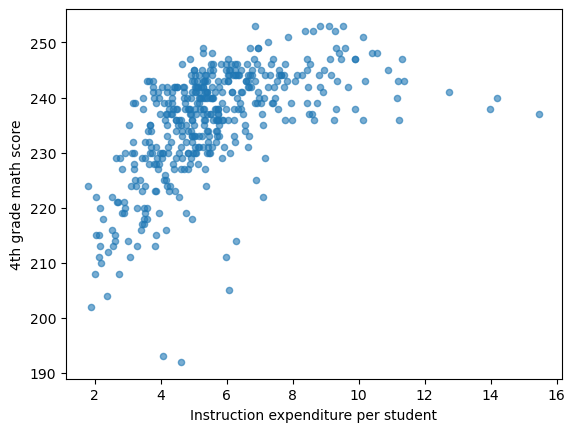

In [75]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction expenditure per student')
plt.ylabel('4th grade math score')

Seeing some of the same type of graph as was observed with total expendature, with a possible steeper positive slope

**Visualization 3**

Text(0, 0.5, '4th grade math score')

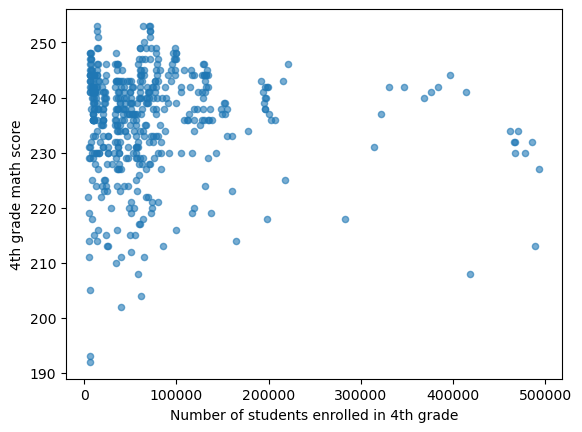

In [81]:
df.plot.scatter(x='ENROLL_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Number of students enrolled in 4th grade')
plt.ylabel('4th grade math score')

This graph is much more scattered than the other 2 graphs, shows very little to no correlation between how many students are enrolled in 4th grade and how they perform in math

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df[['ENROLL_4','INSTRUCTION_EXPENDITURE_PER_STUDENT','TOTAL_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [84]:
y.fillna(y.median(), inplace=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [86]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [87]:
# create your model here
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [92]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.3498980596501282
1.1937583698437628
6.568714849994773
8.894677447318136


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

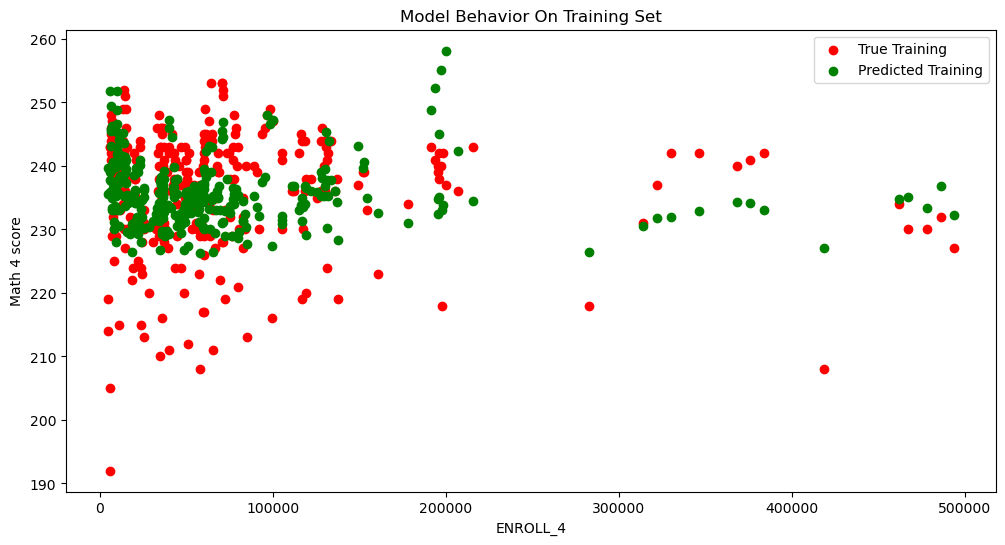

In [93]:
col_name = 'ENROLL_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

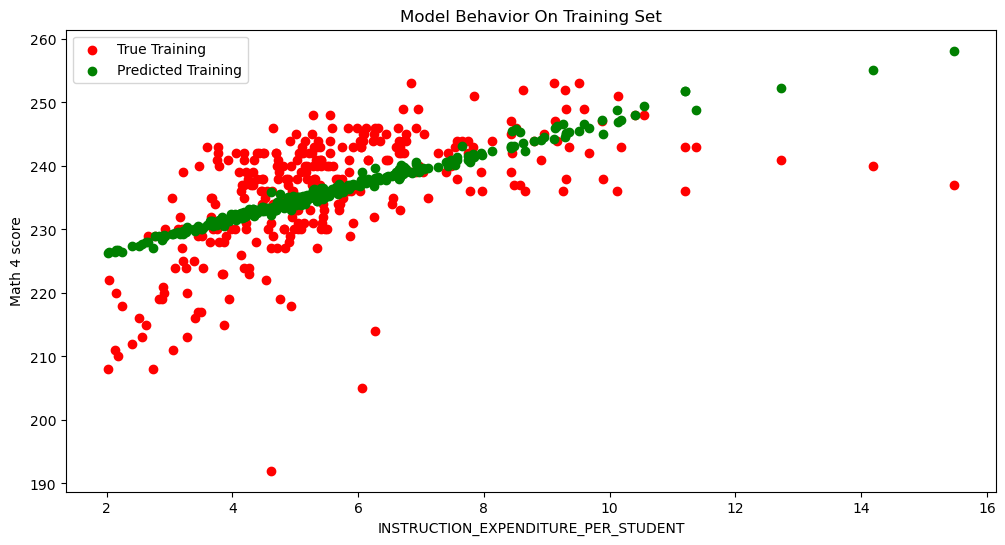

In [94]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

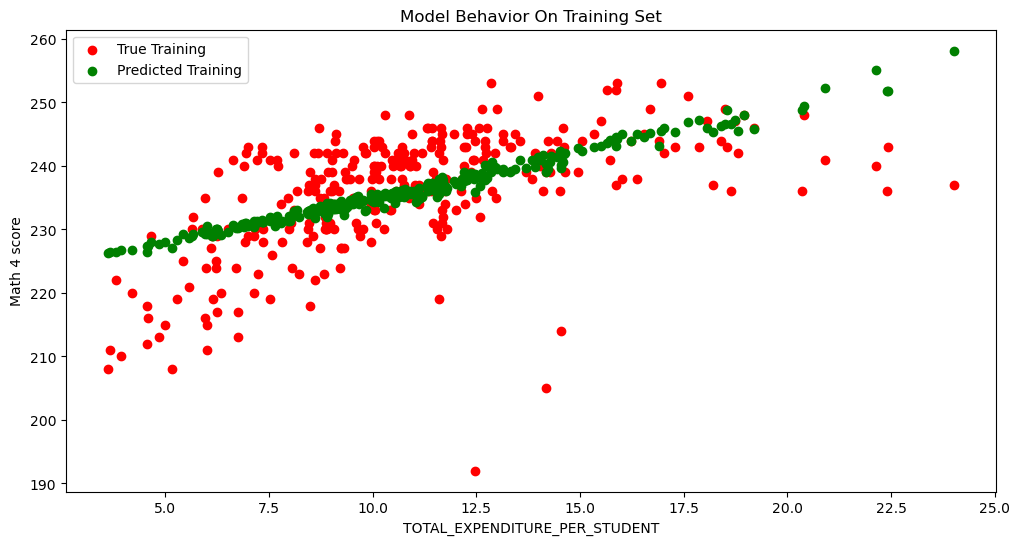

In [95]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

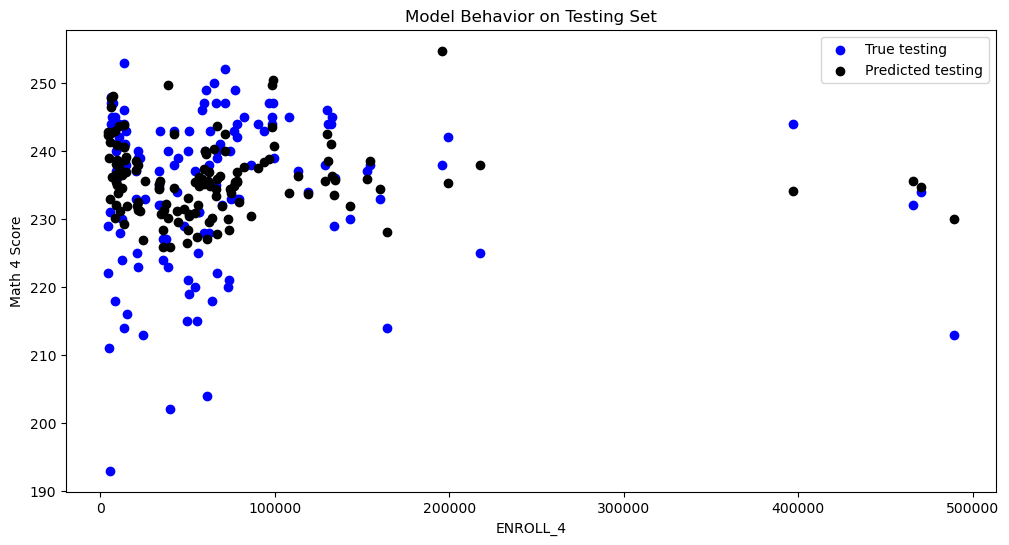

In [96]:
col_name = 'ENROLL_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

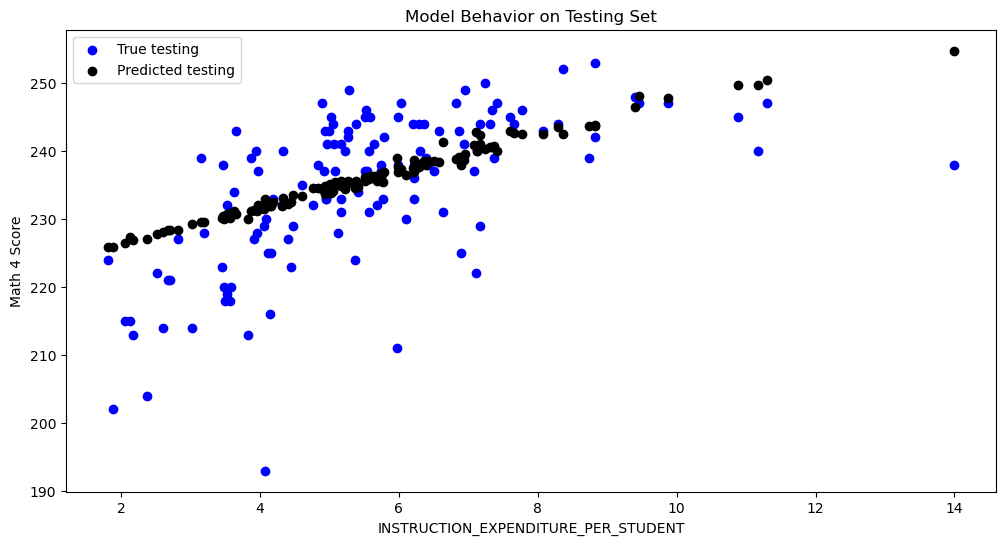

In [97]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

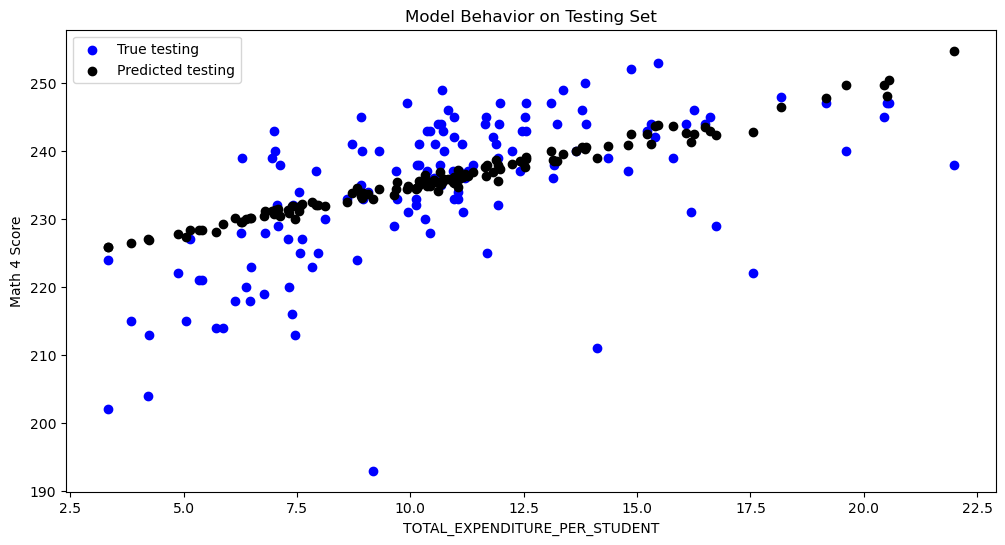

In [98]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Overall, in this tutorial I wanted to investigate how certain factors affected the math scores of 4th graders in America. To start, the factors that I chose to investigate were the number of students enrolled in 4th grade, the total amount of expenditures per student, and the insturctor expenditures per student. The reason I chose to use total number of 4th graders enrolled is because I was curious to seeing if a school having more total students could have made it harder or easier to get good math grades. I chose to use total expenditures per student because I wanted to see if how much money was put into the school played a role in how well the 4th graders performed. Finally, for teacher expenditures per student, I chose this variable because I wanted to investigate further into the idea of expenditures creating better scores, and to see if one aspect of the expenditures was more successful than another. For my expenditure variables, I standardized them so that I could compare the expenditures of schools with different amounts of students. When it came to making visualizations, the graph between number of 4th graders enrolled and 4th grade math scores was fairly randomly scattered, showing little to no correlation. The graphs for total expenditures and instructor expenditures both showed a fairly strong correlation, indicating that it is possible that spending more money into the schools could result in stronger math grades among fourth graders. Also, the graph for the instructor expenditures had a larger slop than the graph for the total expenditures, indicating that it could be possible that specifically spending money on teachers is the most beneficial in improving 4th graders math grades. Finally, I created a model to try and predict the 4th grade math scores for the 3 different variables I investigated. While the model was fairly succesful at predicting the math scores based on the number of students enrolled, it struggled in trying to predict the 4th grade math scores based on total expenditure per student and instructor expenditure per student